In [68]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt




In [69]:
# Load gambar
image = cv2.imread('data/pantai.jpg')

image = cv2.resize(image, (200, 200))
# Convert BGR ke RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Ubah gambar menjadi 2D array (dimensi piksel dikonversi menjadi baris vektor)
pixels = image.reshape(-1, 3)
pixels.shape[0]


62500

In [70]:
import numpy as np

def euclidean_distance(point1, point2):
    """Hitung jarak Euclidean antara dua titik."""
    return np.sqrt(np.sum((point1 - point2) ** 2))

def kmeans_manual(features, k, centroids, max_iters=100):
    for it in range(max_iters):
        # 2. Assign cluster
        labels = np.zeros(features.shape[0])
        for i in range(features.shape[0]):
            distances = np.array([euclidean_distance(features[i], centroid) for centroid in centroids])
            labels[i] = np.argmin(distances)  
        # 3. Update centroid
        new_centroids = np.zeros(centroids.shape)
        for j in range(k):
            if np.any(labels == j):  
                new_centroids[j] = features[labels == j].mean(axis=0)
        print(it)
        # 4. Periksa konvergensi (jika centroid tidak berubah)
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids
    return labels, centroids

In [71]:
num_clusters = 3
stcentroid = np.array([
    [200,200,0],
    [200,200,200],
    [0,0,200]
])
labels, centroids = kmeans_manual(pixels,num_clusters,stcentroid)

# Buat gambar baru berdasarkan label cluster
clustered_image = labels.reshape(image.shape[:2])


0
1
2
3
4
5
6
7
8
9
10
11


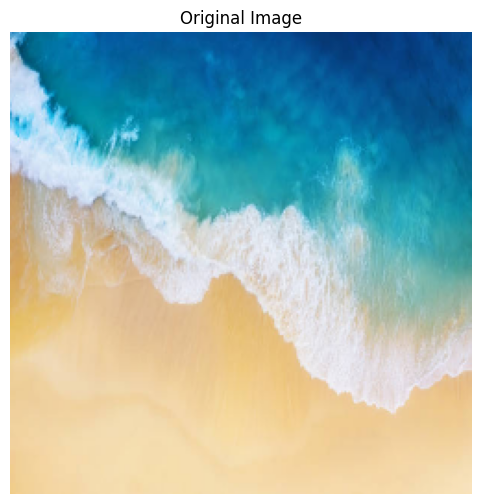

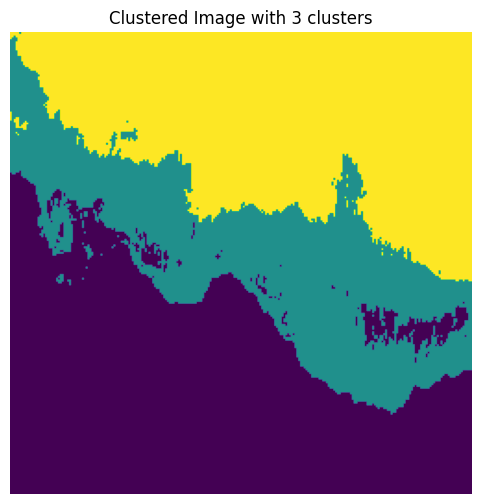

In [72]:

# Visualisasi hasil clustering
def show_image(image, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

show_image(image, 'Original Image')
show_image(clustered_image, f'Clustered Image with {num_clusters} clusters')


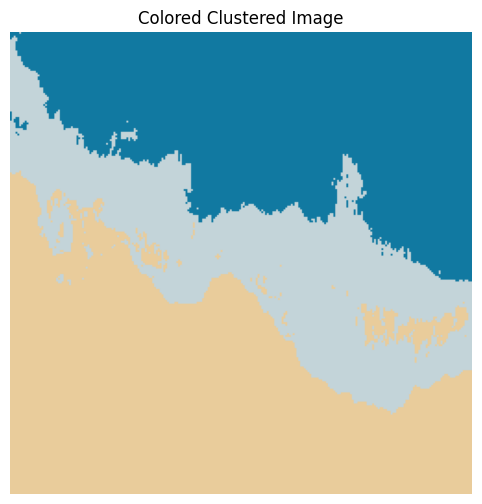

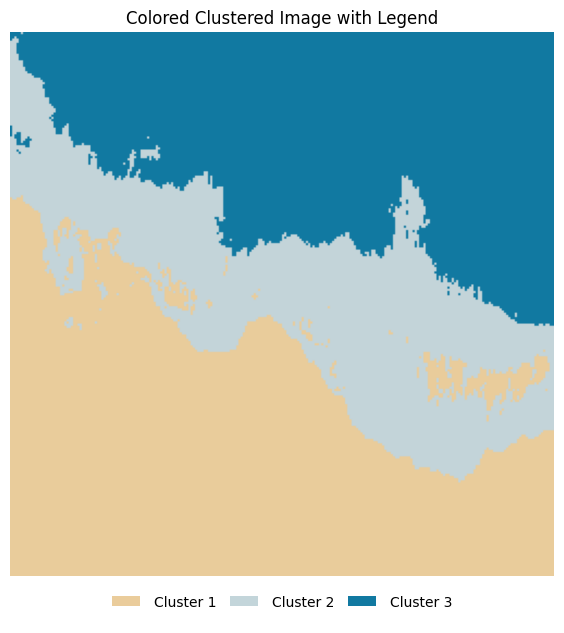

In [73]:
# Visualisasi gambar berwarna dengan cluster
# Buat gambar baru berdasarkan label cluster
def visualize_clusters(image, labels, num_clusters, pixels):
    # Buat array kosong untuk gambar cluster
    clustered_rgb_image = np.zeros_like(image)
    
    # Hitung warna dominan untuk setiap cluster
    for cluster in range(num_clusters):
        # Ambil semua piksel yang termasuk dalam cluster saat ini
        cluster_pixels = pixels[labels.flatten() == cluster]
        
        # Hitung rata-rata warna dari piksel dalam cluster ini
        dominant_color = centroids[cluster]
        
        # Warna piksel sesuai warna dominan dari cluster
        clustered_rgb_image[labels == cluster] = dominant_color

    return clustered_rgb_image

# Fungsi untuk menampilkan gambar dengan legenda
def show_image_with_legend(image, centroids, num_clusters, title):
    plt.figure(figsize=(8, 8))  # Ukuran gambar lebih besar untuk memberi ruang pada legenda
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

    # Buat list untuk memetakan warna centroid ke legenda
    legend_labels = []
    for i in range(num_clusters):
        # Buat patch warna untuk setiap cluster
        color_patch = plt.Rectangle((0, 0), 1, 1, fc=centroids[i]/255.0)
        legend_labels.append(color_patch)
    
    # Tambahkan lebih banyak ruang di bawah gambar untuk legenda
    plt.subplots_adjust(bottom=0.2)  # Memberi ruang ekstra di bawah gambar untuk legenda
    
    # Tambahkan legenda di bawah gambar
    plt.legend(legend_labels, [f'Cluster {i+1}' for i in range(num_clusters)],
               loc="lower center", ncol=num_clusters, bbox_to_anchor=(0.5, -0.1), 
               frameon=False, borderpad=1, handletextpad=1, columnspacing=1)

    plt.show()
    
labels_reshaped = labels.reshape(image.shape[:2])
colored_clustered_image = visualize_clusters(image, labels_reshaped, num_clusters, pixels)
show_image(colored_clustered_image, 'Colored Clustered Image')
# Tampilkan gambar dengan legenda
show_image_with_legend(colored_clustered_image, centroids, num_clusters, 'Colored Clustered Image with Legend')